## 4-連結数

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# connect4
def connect_4(img):
    H, W, C = img.shape
    
    # prepare temporary image
    tmp = np.zeros((H,W), dtype=np.int)
    
    # binarize
    tmp[img[...,0]>0] = 1
    
    # prepare out image
    out = np.zeros((H, W, 3), dtype=np.uint8)
    
    # each pixel
    for y in range(H):
        for x in range(W):
            if tmp[y,x] < 1:
                continue
            
            S = 0
            S += (tmp[y, min(x+1, W-1)] - tmp[y, min(x+1, W-1)]*tmp[max(y-1,0), min(x+1, W-1)]*tmp[max(y-1, 0), x])
            S += (tmp[max(y-1, 0), x] - tmp[max(y-1, 0), x]*tmp[max(y-1, 0), max(x-1, 0)]*tmp[y, max(x-1, 0)])
            S += (tmp[y, max(x-1, 0)] - tmp[y, max(x-1, 0)]*tmp[min(y+1, H-1), max(x-1, 0)]*tmp[min(y+1, H-1), x])
            S += (tmp[min(y+1, H-1), x] - tmp[min(y+1, H-1), x]*tmp[min(y+1, H-1), min(x+1, W-1)]*tmp[y, min(x+1, W-1)])
            
            if S == 0:
                out[y,x] = [0,0,255]  # blue
            elif S == 1:
                out[y,x] = [0,255,0]  # green
            elif S == 2:
                out[y,x] = [255,0,0]  # red
                #print('S=2')
            elif S == 3:
                out[y,x] = [255,255,0]  # yellow
                #print('S=3')
            elif S == 4:
                out[y,x] = [255,0,255]  # pink?
                print('S=4')
                
    out = out.astype(np.uint8)
    
    return out



True

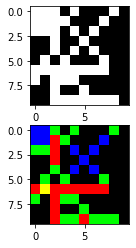

In [15]:
# Read image
img = cv2.imread("../renketsu.png").astype(np.uint8)
plt.subplot(2, 1, 1)
plt.imshow(img)

out = connect_4(img)

# Save result
plt.subplot(2, 1, 2)
plt.imshow(out)
cv2.imwrite("out61.png", out)
